In [1]:
# import packages, libraries
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

!pip install mne
import mne

from scipy.signal import welch
import pywt
import scipy.io as sio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 74.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/dataset folder/all_32_deap.mat'
data = scipy.io.loadmat(data_path)

In [5]:
variables = data.keys()
print(variables)

dict_keys(['__header__', '__version__', '__globals__', 'all_32_data-deap'])


In [22]:
label_path = '/content/drive/MyDrive/dataset folder/final_labels_deap.mat'
label = scipy.io.loadmat(label_path)

In [23]:
lvariables = label.keys()
print(lvariables)

dict_keys(['__header__', '__version__', '__globals__', 'valance', 'arousal', 'dominance', 'likelihood'])


In [25]:
features = data['all_32_data-deap']
target = label['valance']
target2 =label['arousal']
target3 = label['dominance']
target4 = label['likelihood']

In [8]:
type(target)

numpy.ndarray

In [26]:
print(features.shape)
print(target.shape)

(1280, 416)
(1280,)


In [33]:
print(target[44])
print(target2[51])
print(target4[500])
print(target3[47])

Low 
High
Low 
High


# feature selection :

In [35]:
n_labels_path = '/content/drive/MyDrive/dataset folder/all_32_label_deap.mat'
n_labels = scipy.io.loadmat(n_labels_path)

In [36]:
var =n_labels.keys()
print(var)

dict_keys(['__header__', '__version__', '__globals__', 'all_label_deap'])


In [38]:
nm_labels = n_labels['all_label_deap']
print(nm_labels.shape)

(1280, 4)


In [39]:
valance_label = nm_labels[ : , 0]
valance_label.shape

(1280,)

In [53]:
X = features
y = target

# Anova :

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif


anova_selector = SelectKBest(score_func=f_classif, k=100)
X_selected = anova_selector.fit_transform(X, y)


In [61]:
X_selected.shape

(1280, 100)

Accuracy: 0.5703125
Runtime: 0.0012907981872558594


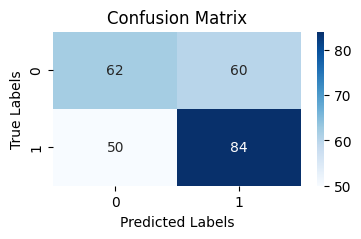

In [62]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time


X = X_selected                                          #CHANGE THIS ACCORDINGLY
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=25)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate runtime
runtime = end_time - start_time

# Print accuracy and runtime
print("Accuracy:", accuracy)
print("Runtime:", runtime)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Accuracy: 0.5859375
Runtime: 2.3468782901763916 seconds


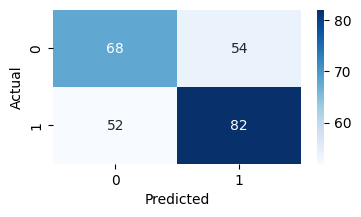

In [64]:

from sklearn.ensemble import RandomForestClassifier


# Assuming your features are stored in X and labels in y
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate runtime
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
